
Preview of the Data:
           Country        Food Category  Total Waste (Tons)  \
Year                                                          
2024         India  Fruits & Vegetables            11962.89   
2024       Germany        Prepared Food            45038.72   
2024  South Africa          Frozen Food            39478.70   
2024           USA            Beverages            22924.85   
2024  Saudi Arabia        Prepared Food            33085.77   

      Economic Loss (Million $)  Avg Waste per Capita (Kg)  \
Year                                                         
2024                   11196.04                     136.21   
2024                   39191.25                     179.27   
2024                   40087.26                     155.55   
2024                   22406.24                      89.59   
2024                   28923.13                      37.71   

      Population (Million)  Household Waste (%)  
Year                                             
2

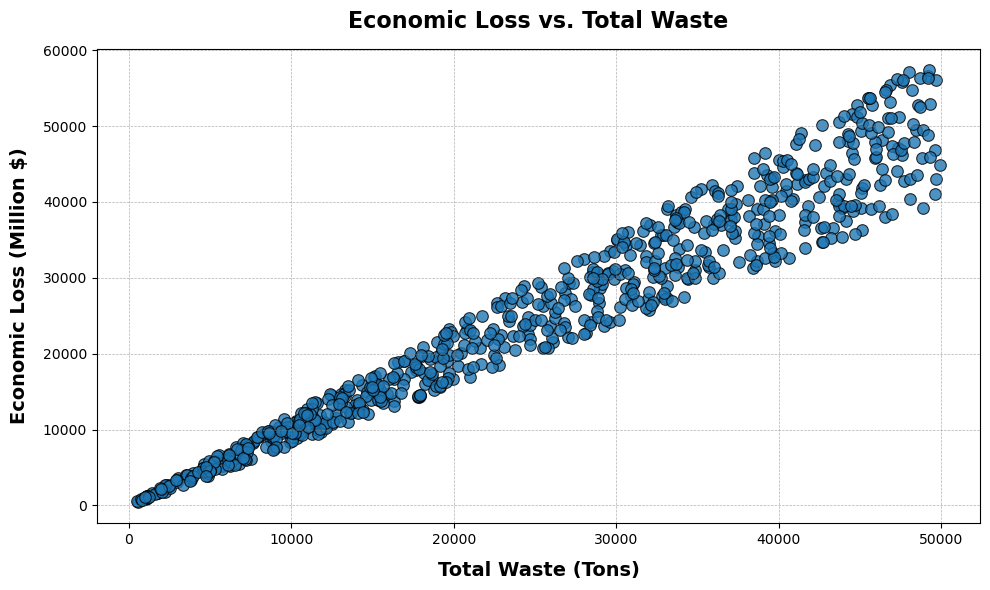

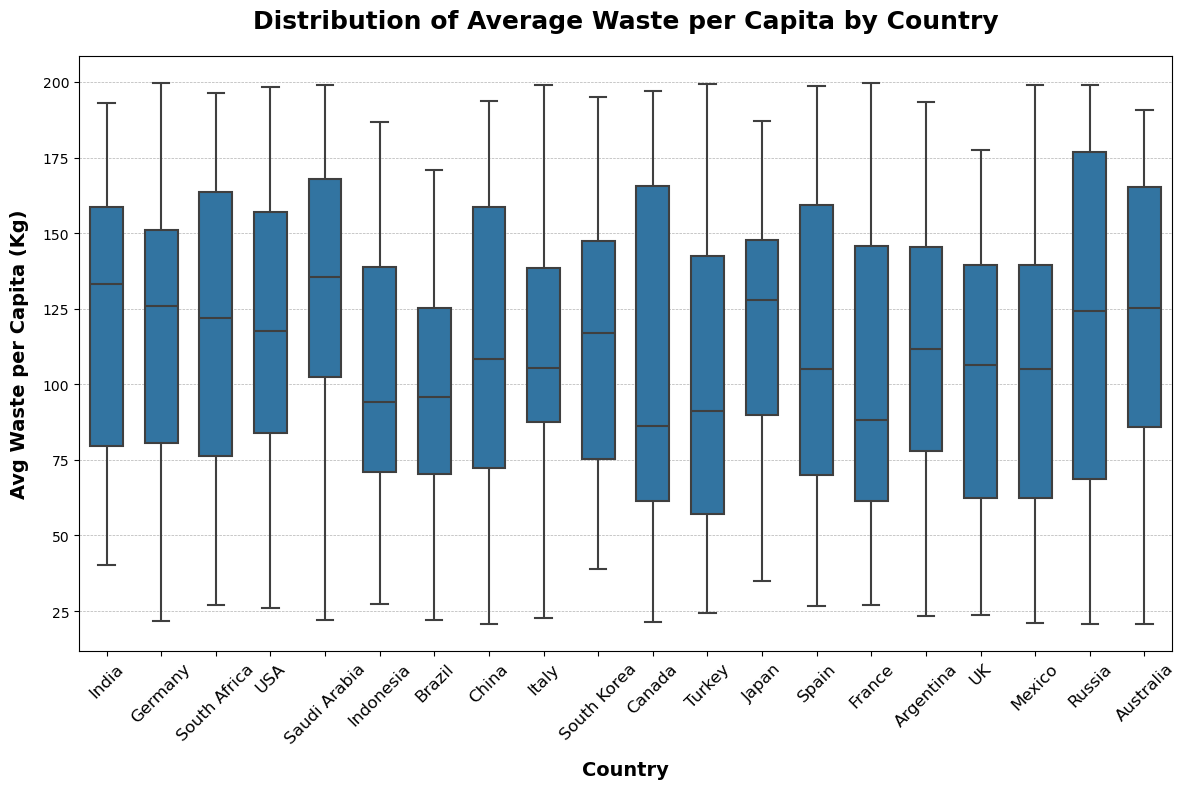

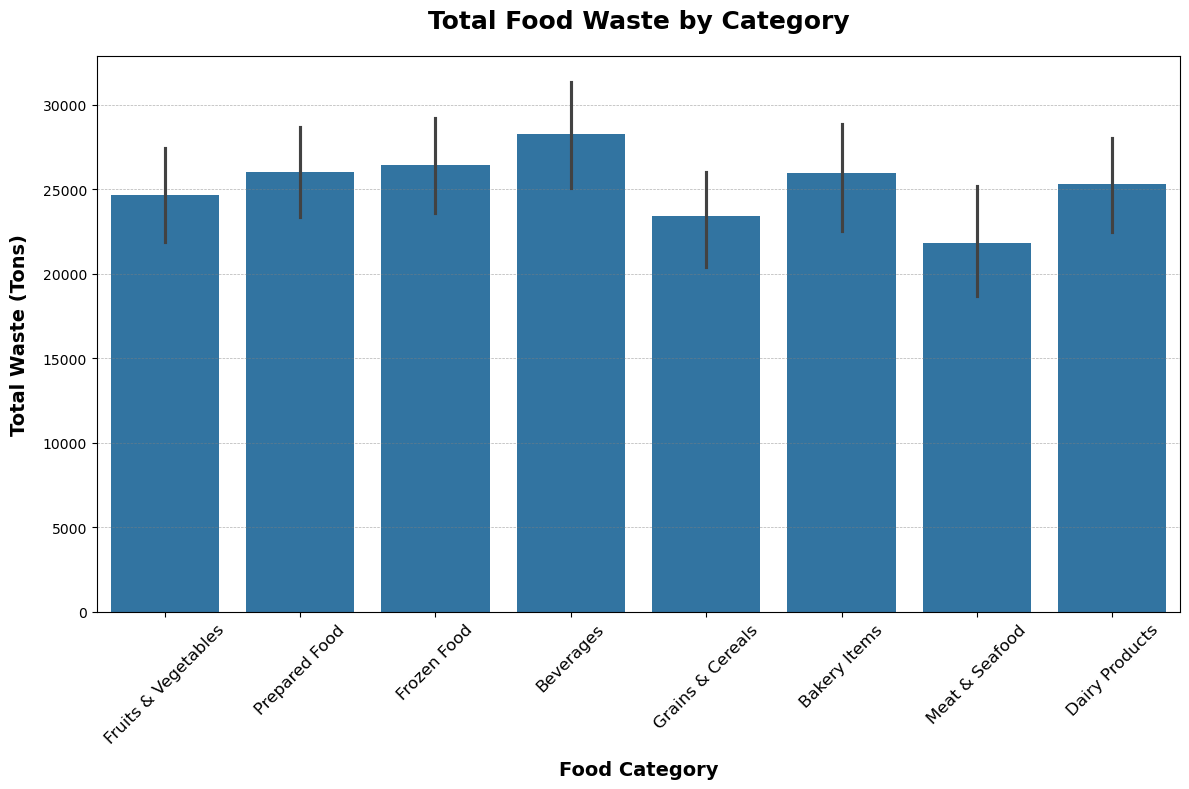

For the attribute Total Waste (Tons):
Mean = 25200.91, Standard Deviation = 14289.53, Skewness = -0.00, and Excess Kurtosis = -1.25.
The data was not skewed and platykurtic.
 2 clusters silhouette score = 0.35
 3 clusters silhouette score = 0.38
 4 clusters silhouette score = 0.41
 5 clusters silhouette score = 0.39
 6 clusters silhouette score = 0.38
 7 clusters silhouette score = 0.38
 8 clusters silhouette score = 0.38
 9 clusters silhouette score = 0.38
10 clusters silhouette score = 0.38
Best number of clusters =  4


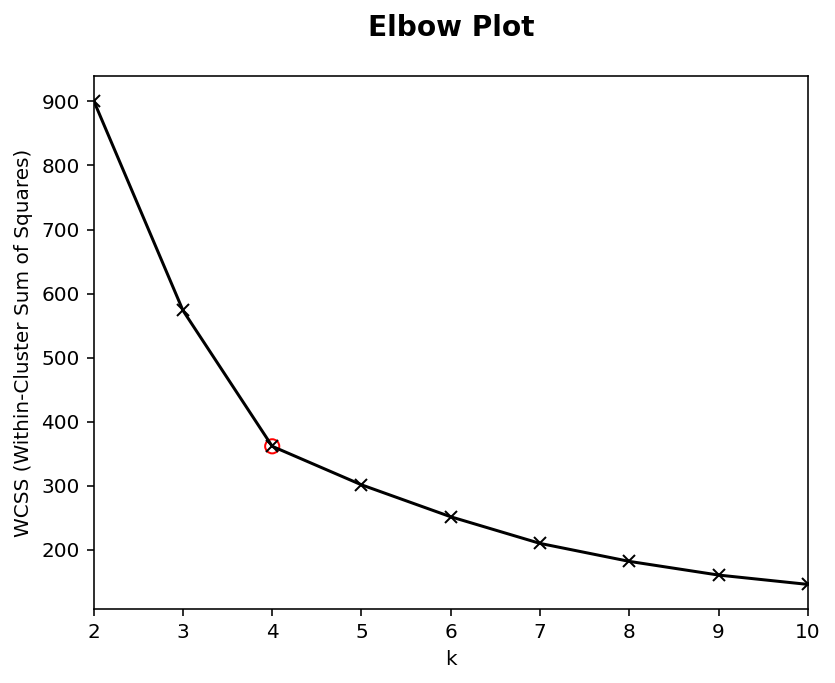

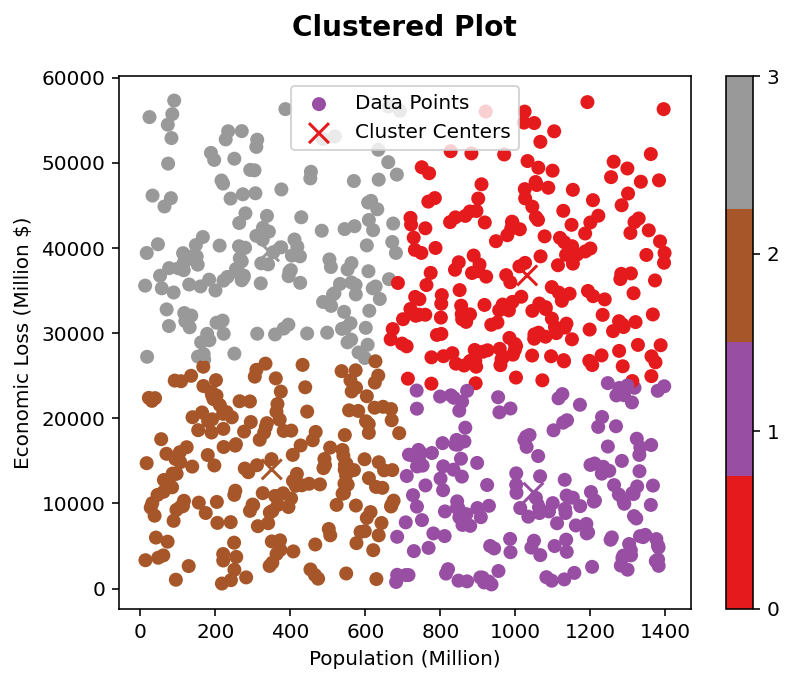

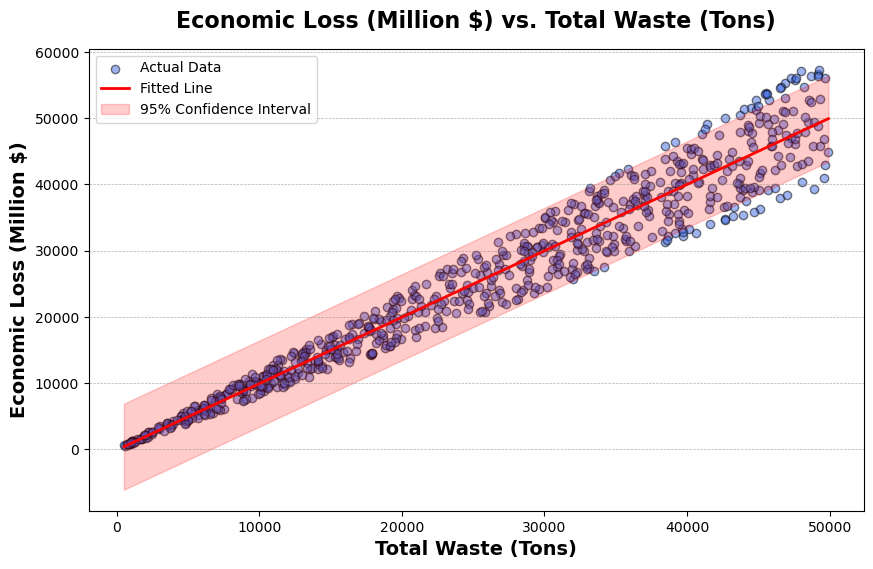

In [16]:
"""
This is the template file for the clustering and fitting assignment.
You will be expected to complete all the sections and
make this a fully working, documented file.
You should NOT change any function, file or variable names,
 if they are given to you here.
Make use of the functions presented in the lectures
and ensure your code is PEP-8 compliant, including docstrings.
Fitting should be done with only 1 target variable and 1 feature variable,
likewise, clustering should be done with only 2 variables.
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from matplotlib.colors import ListedColormap
import warnings
warnings.filterwarnings("ignore", category=UserWarning)


def plot_relational_plot(df):
    """
    Visualizes the relationship between Total Waste
    and Economic Loss using a scatter plot.
    """
    fig, ax = plt.subplots(figsize = (10, 6))
    # Scatter plot
    sns.scatterplot(
        x = 'Total Waste (Tons)',
        y = 'Economic Loss (Million $)',
        data = df,
        alpha = 0.8,
        s = 70,
        edgecolors = 'black',
        linewidths = 0.8
    )
    # Set axis labels
    ax.set_xlabel('Total Waste (Tons)',
                  fontsize = 14, fontweight = 'bold', labelpad = 10)
    ax.set_ylabel('Economic Loss (Million $)',
                  fontsize = 14, fontweight = 'bold', labelpad = 10)
    # Set plot title
    ax.set_title('Economic Loss vs. Total Waste',
                 fontsize=16, fontweight='bold', pad=15)
    ax.grid(True, linestyle='--', alpha=0.6,
            which='both', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('relational_plot.png')
    plt.show()
    return


def plot_categorical_plot(df):
    """
    Plots a bar chart to compare total food
    waste (in tons) across different food categories.
    """
    fig, ax = plt.subplots(figsize=(12, 8))
    # Create the bar plot
    sns.barplot(
        x='Food Category',
        y='Total Waste (Tons)',
        data=df,
        ax=ax,
        dodge=False,
        legend=False
    )
    # Set axis labels
    ax.set_xlabel('Food Category', fontsize=14,
                  fontweight='bold', labelpad=10)
    ax.set_ylabel('Total Waste (Tons)', fontsize=14,
                  fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    # Set title
    ax.set_title('Total Food Waste by Category',
                 fontsize=18, fontweight='bold', pad=20)
    ax.grid(True, linestyle='--', alpha=0.6, which='both',
            axis='y', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('categorical_plot.png')
    plt.show()
    return


def plot_statistical_plot(df):
    """
    Visualizes the distribution of average waste per capita
    (Kg) across different countries using a box plot.
    """
    fig, ax = plt.subplots(figsize = (12, 8))
    # Create the box plot
    sns.boxplot(
        x='Country',
        y='Avg Waste per Capita (Kg)',
        data=df,
        width=0.6,
        linewidth=1.5,
        fliersize=4,
        ax=ax,
        dodge=False
    )
    # Set title and labels
    ax.set_title('Distribution of Average Waste per Capita by Country',
                 fontsize=18, fontweight='bold', pad=20)
    ax.set_xlabel('Country', fontsize=14, fontweight='bold', labelpad=10)
    ax.set_ylabel('Avg Waste per Capita (Kg)', fontsize=14,
                  fontweight='bold', labelpad=10)
    ax.tick_params(axis='x', rotation=45, labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.6, which='both',
            axis='y', color='gray', linewidth=0.5)
    plt.tight_layout()
    plt.savefig('statistical_plot.png')
    plt.show()
    return


def statistical_analysis(df, col: str):
    """
    Compute statistical moments: mean, standard deviation, skewness,
    and excess kurtosis for a given column.
    """
    mean = df[col].mean()
    stddev = df[col].std()
    skew = ss.skew(df[col])
    excess_kurtosis = ss.kurtosis(df[col])
    return mean, stddev, skew, excess_kurtosis


def preprocessing(df):
    """
    Prepare the data by detecting missing values, generating
    summary statistics, and assessing correlations.
    """
    # Display the first few rows of the data
    print("\nPreview of the Data:")
    print(df.head())
    # Show summary statistics for numeric columns
    print("\nStatistical Summary:")
    print(df.describe())
    # Identify columns with missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values per Column:")
    print(missing_values[missing_values > 0])
    # Focus on numeric columns for correlation analysis
    numeric_df = df.select_dtypes(include = [np.number])
    # Calculate and display the correlation matrix for numeric data
    print("\nCorrelation Matrix:")
    print(numeric_df.corr())
    return df


def writing(moments, col):
    """
    Print statistical moments analysis.
    """
    print(f'For the attribute {col}:')
    print(f'Mean = {moments[0]:.2f}, '
          f'Standard Deviation = {moments[1]:.2f}, '
          f'Skewness = {moments[2]:.2f}, and '
          f'Excess Kurtosis = {moments[3]:.2f}.')
    print('The data was not skewed and platykurtic.')
    return


def perform_clustering(df, col1, col2):
    """
    Performs K-means clustering on two specified
    columns and returns clustering results.
    """
    df_clust = df[[col1, col2]].copy()
    # Use StandardScaler for better cluster separation
    scaler = StandardScaler()
    norm = scaler.fit_transform(df_clust)

    def plot_elbow_method(min_k, max_k, wcss, best_n):
        """
        Plots the elbow method to determine the optimal number of clusters.
        """
        fig, ax = plt.subplots(dpi=144)
        ax.plot(range(min_k, max_k + 1), wcss, 'kx-')
        ax.scatter(best_n, wcss[best_n - min_k], marker='o',
                   color = 'red', facecolors = 'none', s=50)
        ax.set_xlabel('k')
        ax.set_xlim(min_k, max_k)
        plt.title('Elbow Plot', fontsize=14, fontweight='bold', pad=20)
        ax.set_ylabel('WCSS (Within-Cluster Sum of Squares)')
        plt.savefig('elbow_plot.png')
        plt.show()
        return

    def one_silhouette_inertia(n, xy):
        """
        Computes the silhouette score and inertia for a
        given number of clusters.
        """
        kmeans = KMeans(n_clusters=n, init='k-means++',
                        n_init=50, random_state=42)
        kmeans.fit(xy)
        labels = kmeans.labels_
        _score = silhouette_score(xy, labels)
        _inertia = kmeans.inertia_
        return _score, _inertia

    wcss = []
    best_n, best_score = None, -np.inf
    for n in range(2, 11):
        score, inertia = one_silhouette_inertia(n, norm)
        wcss.append(inertia)
        if score > best_score:
            best_n = n
            best_score = score
        print(f"{n:2g} clusters silhouette score = {score:0.2f}")
    kmeans = KMeans(n_clusters=best_n, init='k-means++',
                    n_init=50, random_state=42)
    kmeans.fit(norm)
    labels = kmeans.labels_
    cen = scaler.inverse_transform(kmeans.cluster_centers_)
    xkmeans = cen[:, 0]
    ykmeans = cen[:, 1]
    cenlabels = kmeans.predict(kmeans.cluster_centers_)
    print(f"Best number of clusters = {best_n:2g}")
    plot_elbow_method(2, 10, wcss, best_n)
    return labels, df_clust.values, xkmeans, ykmeans, cenlabels


def plot_clustered_data(labels, data, xkmeans, ykmeans, centre_labels):
    """
    Plots clustered data as a scatter plot with cluster centers highlighted.
    """
    unique_labels = np.unique(labels)
    colors = plt.cm.Set1(np.linspace(0, 1, len(unique_labels)))
    cmap = ListedColormap(colors)

    fig, ax = plt.subplots(dpi=144)
    scatter = ax.scatter(data[:, 0], data[:, 1],
                         c=labels, cmap=cmap, marker='o', label='Data Points')
    ax.scatter(xkmeans, ykmeans, c=centre_labels,
               cmap=cmap, marker='x', s=100, label='Cluster Centers')
    colorbar = fig.colorbar(scatter, ax=ax)
    colorbar.set_ticks(unique_labels)
    ax.set_xlabel('Population (Million)')
    ax.set_ylabel('Economic Loss (Million $)')
    plt.title('Clustered Plot', fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='best')
    plt.savefig('clustering.png')
    plt.show()
    return


def perform_fitting(df, col1, col2):
    """
    Fits a linear regression model between two columns
    and computes error margins.
    """
    X = df[[col1]].values
    y = df[col2].values
    model = LinearRegression()
    model.fit(X, y)
    x_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
    y_pred = model.predict(x_range)
    # Compute residuals
    residuals = y - model.predict(X)
    std_error = np.std(residuals)
    return df, x_range, y_pred, model, std_error


def plot_fitted_data(data, x, y, model, std_error):
    """
    Plots actual data points, fitted regression line,
    and confidence intervals.
    """
    fig, ax = plt.subplots(figsize=(10, 6))
    # Scatter plot of actual data
    ax.scatter(data['Total Waste (Tons)'],
               data['Economic Loss (Million $)'],
               label="Actual Data", color='royalblue',
               alpha=0.5, edgecolors='k')
    # Plot fitted line
    ax.plot(x, y, color='red', label="Fitted Line", linewidth=2)
    # Compute confidence interval (95% confidence)
    confidence_interval = 1.96 * std_error
    upper_bound = y + confidence_interval
    lower_bound = y - confidence_interval
    # Fill area between confidence interval
    ax.fill_between(x.flatten(), lower_bound, upper_bound,
                    color='red', alpha=0.2,
                    label="95% Confidence Interval")
    ax.set_xlabel('Total Waste (Tons)', fontsize=14,
                  fontweight='bold')
    ax.set_ylabel('Economic Loss (Million $)',
                  fontsize=14, fontweight='bold')
    ax.set_title('Economic Loss (Million $) vs. Total Waste (Tons)',
                 fontsize=16, fontweight='bold', pad=15)
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6, which='both',
            axis='y', color='gray', linewidth=0.5)
    plt.savefig('fitting.png')
    plt.show()
    return


def main():
    df = pd.read_csv('data.csv', index_col='Year').loc[[2024]]
    df = preprocessing(df)
    col = 'Total Waste (Tons)'
    plot_relational_plot(df)
    plot_statistical_plot(df)
    plot_categorical_plot(df)
    moments = statistical_analysis(df, col)
    writing(moments, col)
    clustering_results = perform_clustering(df, 'Population (Million)',
                                            'Economic Loss (Million $)')
    plot_clustered_data(*clustering_results)
    fitting_results = perform_fitting(df, 'Total Waste (Tons)',
                                      'Economic Loss (Million $)')
    plot_fitted_data(*fitting_results)
    return


if __name__ == '__main__':
    main()


In [387]:
df

,Country,Food Category,Total Waste (Tons),Economic Loss (Million $),Avg Waste per Capita (Kg),Population (Million),Household Waste (%)
Year,,,,,,,
2024,India,Fruits & Vegetables,11962.89,11196.04,136.21,1311.91,37.09
2024,Germany,Prepared Food,45038.72,39191.25,179.27,1349.45,68.93
2024,South Africa,Frozen Food,39478.70,40087.26,155.55,375.84,31.16
2024,USA,Beverages,22924.85,22406.24,89.59,836.05,45.43
2024,Saudi Arabia,Prepared Food,33085.77,28923.13,37.71,552.45,38.96
...,...,...,...,...,...,...,...
2024,Mexico,Beverages,36005.36,31410.97,111.78,120.03,59.35
2024,Spain,Meat & Seafood,4778.57,3898.87,152.62,1308.47,30.75
2024,UK,Frozen Food,43604.59,43474.62,173.77,1328.97,49.61


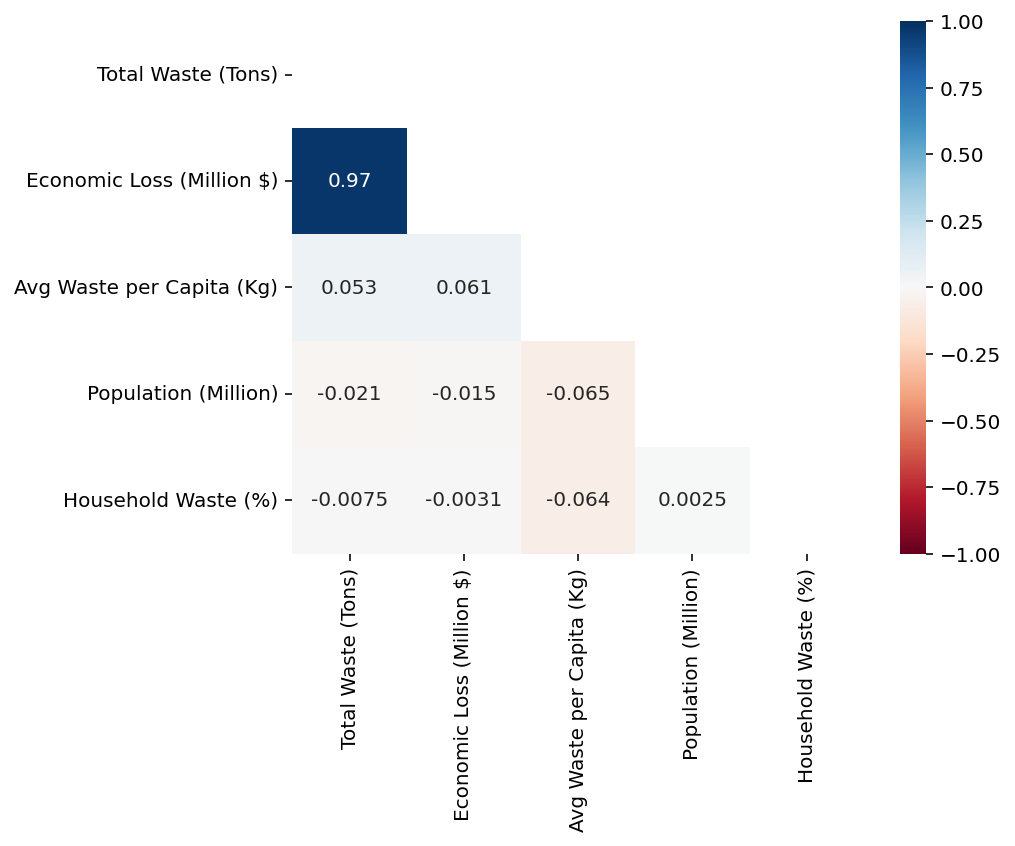

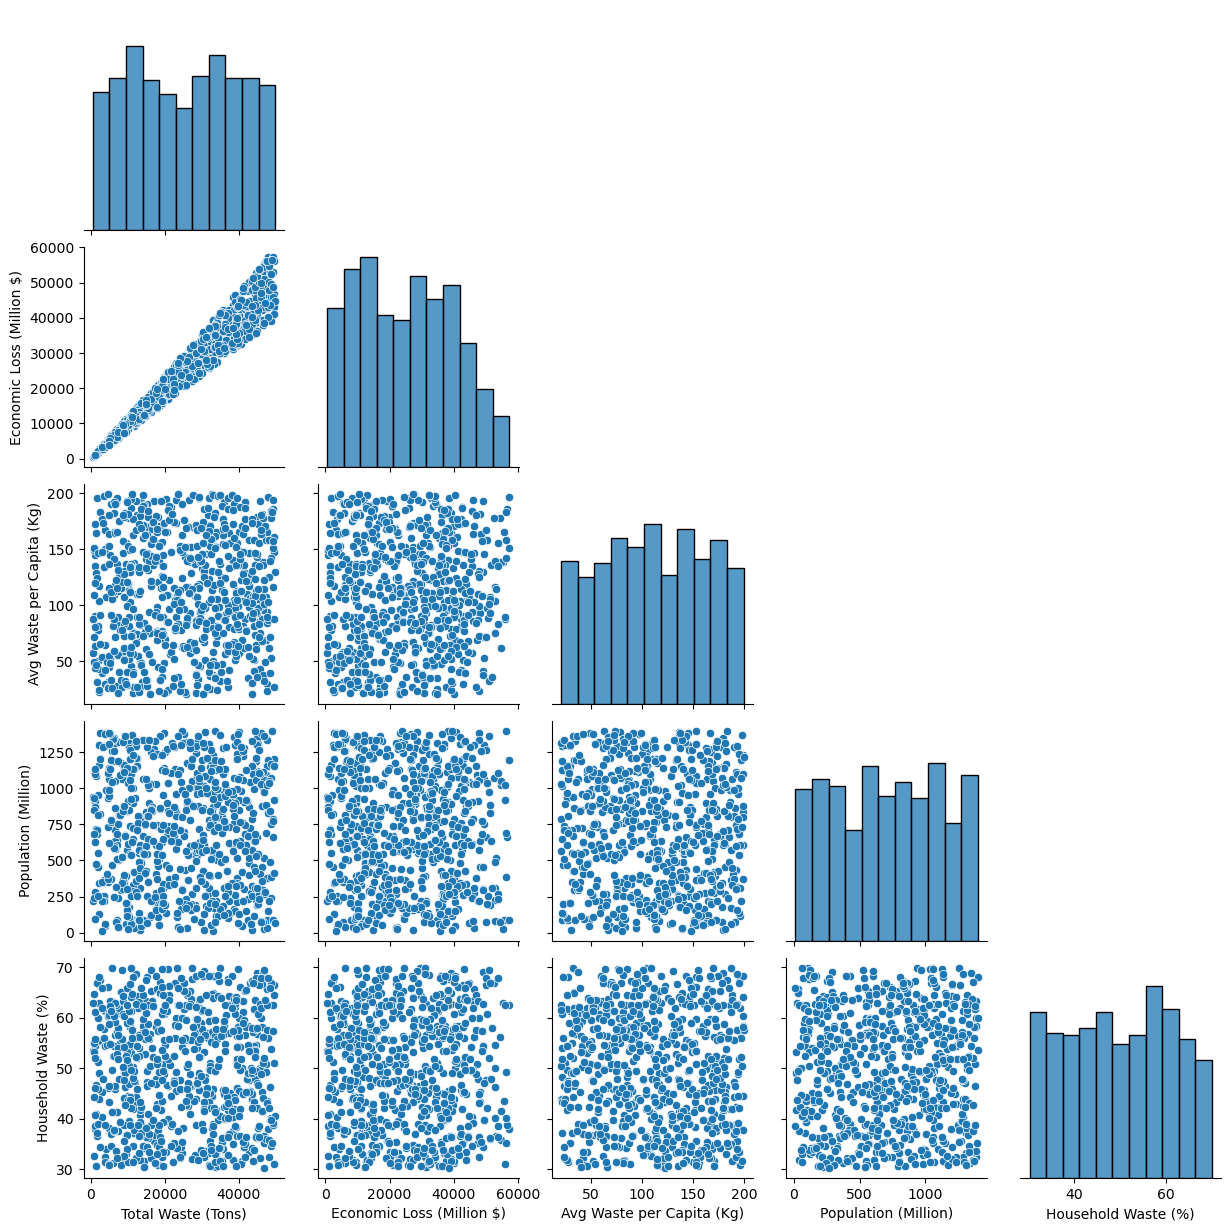

In [347]:
fig, ax = plt.subplots(dpi=144)
mask = np.triu(np.ones_like(df.corr(numeric_only=True)))
sns.heatmap(df.corr(numeric_only=True), ax=ax, vmin=-1, vmax=1,
            cmap='RdBu', annot=True, mask=mask)
plt.show()

sns.pairplot(df, corner=True)
plt.show()